## Test Tensorflow Segmentation Model

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc as misc
import os
import scipy.misc as misc

import sys
sys.path.insert(0, '../tensorflow')
import models

MODEL_FOLDER='/home/laraujo/work/LearnSegmentation/src/tensorflow/save/model-11'
IMAGE_TEST = '/media/laraujo/BigLinuxPart/Open Datasets/sceneparsing/ADEChallengeData2016/images/training/ADE_train_00000202.jpg'
IMAGE_GT = '/media/laraujo/BigLinuxPart/Open Datasets/sceneparsing/ADEChallengeData2016/annotations/training/ADE_train_00000202.png'

# Parameters
gpu = 0
segmentation_type = 'fcn'

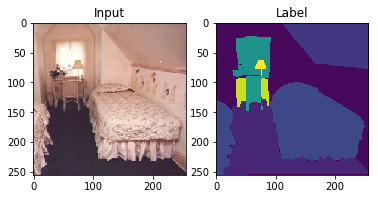

In [15]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
img_input = mpimg.imread(IMAGE_TEST)
img_label = mpimg.imread(IMAGE_GT)
plt.imshow(img_input)
a.set_title('Input')
a=fig.add_subplot(1,2,2)
plt.imshow(img_label)
a.set_title('Label')
plt.show()

### Open Tensorflow model

In [3]:
# Set enviroment variable to set the GPU to use
if gpu != -1:
    os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu)
else:
    print('Set tensorflow on CPU')
    os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Build model
if segmentation_type == 'fcn':
    segmentation_model = models.FullyConvolutionalNetworks()
elif mode.lower() == 'deconvnet':
    segmentation_model = models.FullyConvolutionalNetworks()
elif mode.lower() == 'segnet':
    segmentation_model = models.FullyConvolutionalNetworks()
else:
    segmentation_model = models.FullyConvolutionalNetworks()

# Get Placeholders
model_in = segmentation_model.input
model_out = segmentation_model.output
anotation_prediction = segmentation_model.anotation_prediction

# Load tensorflow model
print("Loading model: %s" % MODEL_FOLDER)
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, MODEL_FOLDER)

Loading model: /home/laraujo/work/LearnSegmentation/src/tensorflow/save/model-11
INFO:tensorflow:Restoring parameters from /home/laraujo/work/LearnSegmentation/src/tensorflow/save/model-11


### Test model on image and display

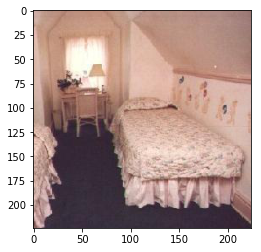

(224, 224)


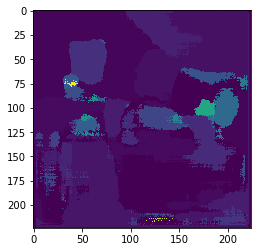

In [16]:
# Resize image to the format expected by the model
img_input = misc.imresize(img_input, [224, 224]) / 255.0
plt.imshow(img_input)
plt.show()

# Run Model with given image
pred = anotation_prediction.eval(feed_dict={model_in: [img_input]})[0]

# Display Results
print(pred.shape)
plt.imshow(pred)
plt.show()